In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.model import *
from ts.utility import Utility
from ts.plot import Plot

%matplotlib inline

# Data

In [2]:
n = 2000

univarData = StandardGenerator('simple').generate(n)
print(univarData.shape, univarData.dtype)

(2000,) float64


In [3]:
trainSize = 1500

trainData, testData = Utility.trainTestSplit(univarData, trainSize,)

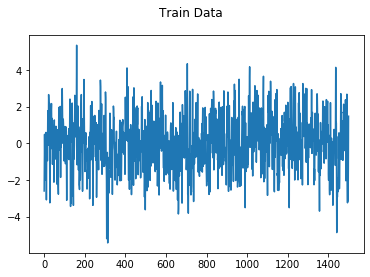

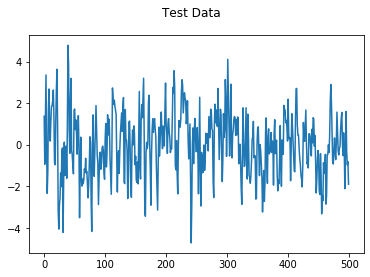

In [21]:
Plot.plotDataCols(trainData, title='Train Data')
Plot.plotDataCols(testData, title='Test Data')

## GMM-HMM model

Text(0.5, 1.0, 'Log Likelihood vs. Iters.')

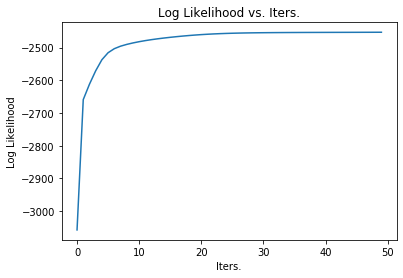

In [24]:
numStates = 4
numMixtureComp = 3
dimension = 1
d = 10
numIterations = 50
threshold = 0.0

model = GmmHmmForecast(
    numStates=numStates,
    numMixtureComp=numMixtureComp,
    dimension=dimension,
    d=d,
    numIterations=numIterations,
    threshold=threshold
)

likelihoodValues = model.train([np.expand_dims(trainData, axis=1)])
plt.plot(likelihoodValues)
plt.xlabel('Iters.')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iters.')

(490, 1) (490,)


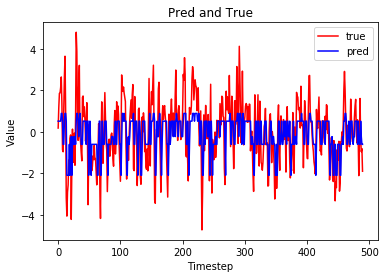

In [26]:
minValue = trainData.min()
maxValue = trainData.max()
numValues = 30
discParamSet = [np.linspace(minValue, maxValue, numValues)]

pred = model.predict(np.expand_dims(testData, axis=1), discParamSet)
target = testData[d:]

print(pred.shape, target.shape)
Plot.plotPredTrue(pred, target)

## GRU model

Epoch 1/25
3/3 [==============================] - 0s 133ms/step - loss: 2.0447
Epoch 2/25
3/3 [==============================] - 0s 133ms/step - loss: 1.9965
Epoch 3/25
3/3 [==============================] - 0s 133ms/step - loss: 1.9591
Epoch 4/25
3/3 [==============================] - 0s 132ms/step - loss: 1.9191
Epoch 5/25
3/3 [==============================] - 0s 136ms/step - loss: 1.8902
Epoch 6/25
3/3 [==============================] - 0s 133ms/step - loss: 1.8705
Epoch 7/25
3/3 [==============================] - 0s 132ms/step - loss: 1.8536
Epoch 8/25
3/3 [==============================] - 0s 133ms/step - loss: 1.8379 0s - loss: 1.837
Epoch 9/25
3/3 [==============================] - 0s 133ms/step - loss: 1.8204
Epoch 10/25
3/3 [==============================] - 0s 132ms/step - loss: 1.8038
Epoch 11/25
3/3 [==============================] - 0s 134ms/step - loss: 1.7871
Epoch 12/25
3/3 [==============================] - 0s 133ms/step - loss: 1.7688
Epoch 13/25
3/3 [===============

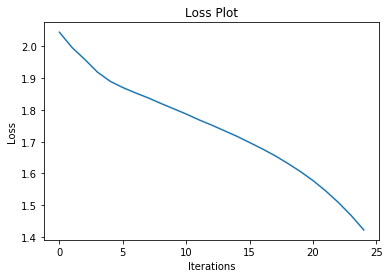

In [19]:
forecastHorizon = 1
stateSize = 10
activation = 'tanh'
numRnnLayers = 2
numTargetVariables = 1
numExoVariables = 0

model = GruForecast(
    forecastHorizon=forecastHorizon,
    stateSize=stateSize,
    activation=activation,
    numRnnLayers=numRnnLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1), 
    seqLength=500
)

seqLength = 500
numIterations = 25
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences=trainSequences,
    numIterations=numIterations
)

Plot.plotLoss(losses)

(499, 1) (499,)


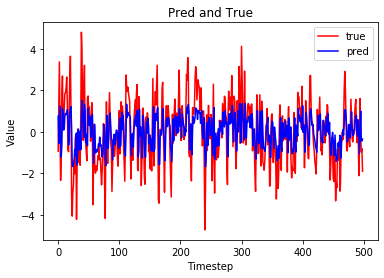

In [20]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## Extreme Model 1

begin iteration 0
Completed Iteration: 0 | time taken:  4.35 sec | Avg Iteration Loss: 2.3897706587408134
begin iteration 1
Completed Iteration: 1 | time taken:  4.23 sec | Avg Iteration Loss: 2.0583199125847154
begin iteration 2
Completed Iteration: 2 | time taken:  4.25 sec | Avg Iteration Loss: 1.8337112378716698
begin iteration 3
Completed Iteration: 3 | time taken:  5.51 sec | Avg Iteration Loss: 1.8113578580587035
begin iteration 4
Completed Iteration: 4 | time taken:  4.53 sec | Avg Iteration Loss: 1.6351325993847636
begin iteration 5
Completed Iteration: 5 | time taken:  4.69 sec | Avg Iteration Loss: 1.8166273304025964
begin iteration 6
Completed Iteration: 6 | time taken:  4.45 sec | Avg Iteration Loss: 1.2618947920838428
begin iteration 7
Completed Iteration: 7 | time taken:  4.40 sec | Avg Iteration Loss: 1.4153219714808343
begin iteration 8
Completed Iteration: 8 | time taken:  4.51 sec | Avg Iteration Loss: 1.2352433122510538
begin iteration 9
Completed Iteration: 9 | tim

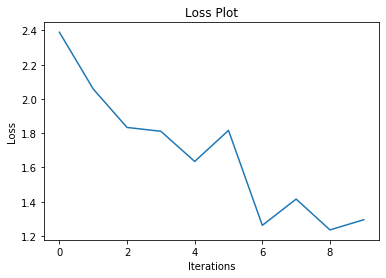

In [34]:
forecastHorizon = 1
memorySize = 20
windowSize = 10
encoderStateSize = 10
lstmStateSize = 10
numExoVariables = 0

model = ExtremeTime(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    encoderStateSize=encoderStateSize,
    lstmStateSize=lstmStateSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)


losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(499,) (499,)


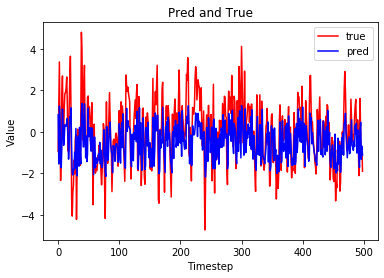

In [35]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## Extreme Model 2

begin iteration 0
Completed Iteration: 0 | time taken:  7.02 sec | Avg Iteration Loss: 1.937492115010181
begin iteration 1
Completed Iteration: 1 | time taken:  6.05 sec | Avg Iteration Loss: 1.7471358513941242
begin iteration 2
Completed Iteration: 2 | time taken:  5.58 sec | Avg Iteration Loss: 1.5678297944532096
begin iteration 3
Completed Iteration: 3 | time taken:  5.77 sec | Avg Iteration Loss: 1.3710648120263766
begin iteration 4
Completed Iteration: 4 | time taken:  6.07 sec | Avg Iteration Loss: 1.2297500673819082
begin iteration 5
Completed Iteration: 5 | time taken:  5.99 sec | Avg Iteration Loss: 1.1361409578681936
begin iteration 6
Completed Iteration: 6 | time taken:  5.94 sec | Avg Iteration Loss: 1.1596201593426718
begin iteration 7
Completed Iteration: 7 | time taken:  5.70 sec | Avg Iteration Loss: 1.117322635213858
begin iteration 8
Completed Iteration: 8 | time taken:  6.06 sec | Avg Iteration Loss: 1.115207268336892
begin iteration 9
Completed Iteration: 9 | time t

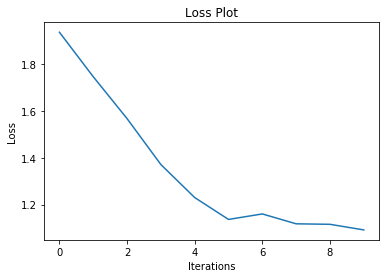

In [36]:
forecastHorizon = 1
memorySize = 20
windowSize = 10
embeddingSize = 10
contextSize = 10
numExoVariables = 0

model = ExtremeTime2(
    forecastHorizon=forecastHorizon,
    memorySize=memorySize,
    windowSize=windowSize,
    embeddingSize=embeddingSize,
    contextSize=contextSize,
    numExoVariables=numExoVariables
)

sequenceLength = 500
numIterations = 10
optimizer = tf.optimizers.Adam(0.05)


losses = model.train(
    targetSeries=trainData,
    sequenceLength=sequenceLength,
    numIterations=numIterations,
    optimizer=optimizer
)

Plot.plotLoss(losses)

(499,) (499,)


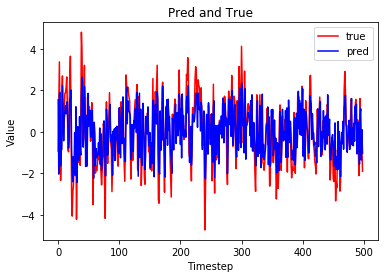

In [37]:
pred = model.predict(targetSeries=testData)

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)

## MLP

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 2.9701
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 1.9682
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 1.6299
Epoch 4/10
3/3 [==============================] - 0s 1ms/step - loss: 1.4219
Epoch 5/10
3/3 [==============================] - 0s 1ms/step - loss: 1.3399
Epoch 6/10
3/3 [==============================] - 0s 1ms/step - loss: 1.2760
Epoch 7/10
3/3 [==============================] - 0s 1ms/step - loss: 1.2287
Epoch 8/10
3/3 [==============================] - 0s 1ms/step - loss: 1.1423
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 1.1051
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0829


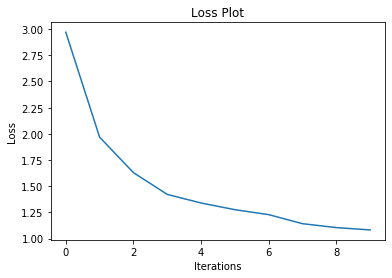

In [39]:
forecastHorizon = 1
lag = 10
activation = 'relu'
numUnitsPerLayer = 10
numLayers = 1
numTargetVariables = 1
numExoVariables = 0

model = DeepNN(
    forecastHorizon=1,
    lag=lag,
    activation=activation,
    numUnitsPerLayer=numUnitsPerLayer,
    numLayers=numLayers,
    numTargetVariables=numTargetVariables,
    numExoVariables=numExoVariables
)

sequenceLength = 500
trainSequences = Utility.breakSeq(
    np.expand_dims(trainData, axis=1), 
    seqLength=500
)

numIterations = 10
optimizer = tf.optimizers.Adam(0.05)

losses = model.train(
    trainSequences,
    numIterations=numIterations,
    optimizer=optimizer
)
Plot.plotLoss(losses)

(489,) (489,)


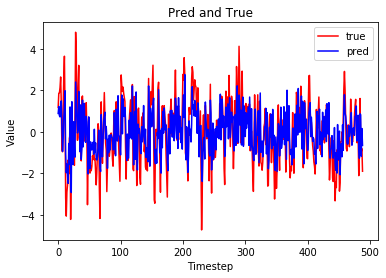

In [42]:
pred = model.predict(targetSeries=np.expand_dims(testData, axis=1))

pred = pred[:pred.shape[0] - forecastHorizon]
target = testData[lag + forecastHorizon:]

print(pred.shape, target.shape)

Plot.plotPredTrue(pred, target)